In [1]:
# Import the Libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from functools import reduce
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python import keras

In [3]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

In [4]:
from keras.models import Sequential
#from tensorflow import keras
#from tensorflow.python import keras
import keras
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

from tensorflow.keras.models import Sequential
from tensorflow.python.keras.models import Input
from keras.layers import Input,Embedding, LSTM, Dense, Masking, Dropout, BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras import Model
from keras.optimizers import Adam, RMSprop
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.utils import plot_model
from keras.models import Sequential


Using TensorFlow backend.


In [5]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


In [6]:
#from hyperopt import Trials, STATUS_OK, tpe
#from hyperas import optim
#from hyperas.distributions import choice, uniform

In [7]:
#Load the data from the csv files

course = pd.read_csv('courses.csv')
assessment = pd.read_csv('assessments.csv')
vle = pd.read_csv('vle.csv')
student_info = pd.read_csv('studentInfo.csv')
student_reg = pd.read_csv('studentRegistration.csv')
student_assessment = pd.read_csv('studentAssessment.csv')
student_vle = pd.read_csv('studentVle.csv')

# Check for Missing or Null Values

Text(0.5, 1.0, 'Assessment')

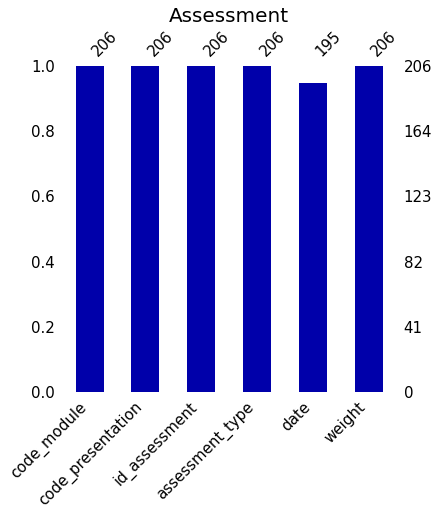

In [8]:
msno.bar(assessment, figsize=(6,6), fontsize=15,color = "#0000AA")
plt.title('Assessment',fontsize=20)

Text(0.5, 1.0, 'Course')

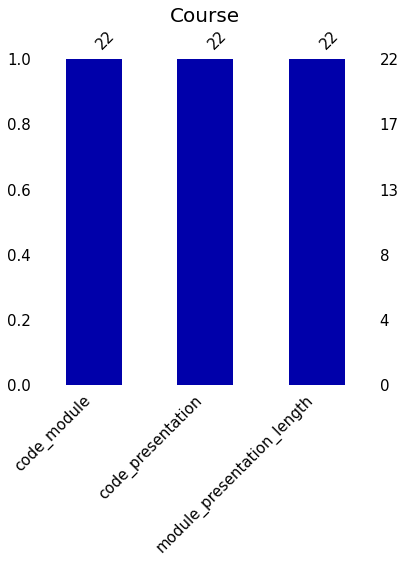

In [9]:
msno.bar(course, figsize=(6,6), fontsize=15,color = "#0000AA")
plt.title('Course',fontsize=20)

Text(0.5, 1.0, 'Student Assessment')

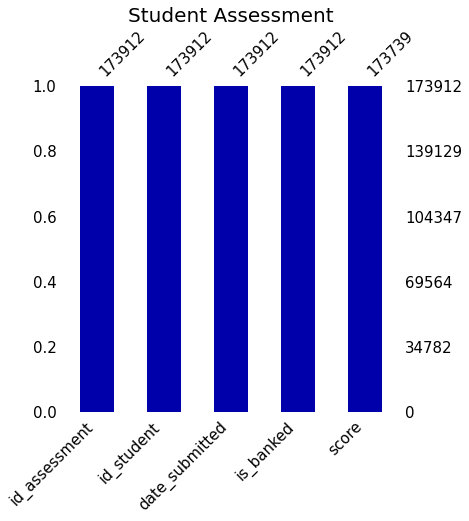

In [10]:
msno.bar(student_assessment, figsize=(6,6), fontsize=15,color = "#0000AA")
plt.title('Student Assessment',fontsize=20)

Text(0.5, 1.0, 'Student Information')

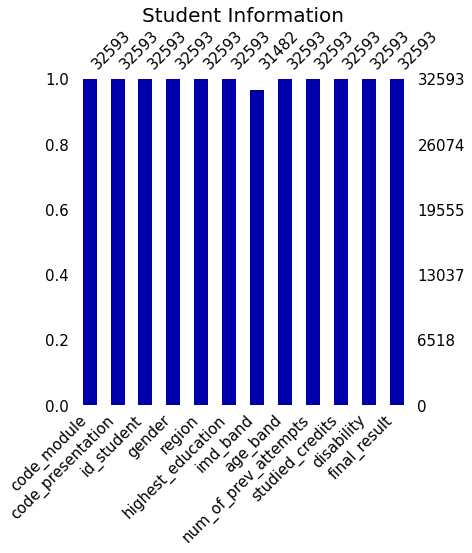

In [11]:
msno.bar(student_info, figsize=(6,6), fontsize=15,color = "#0000AA")
plt.title('Student Information',fontsize=20)

Text(0.5, 1.0, 'Student Registration')

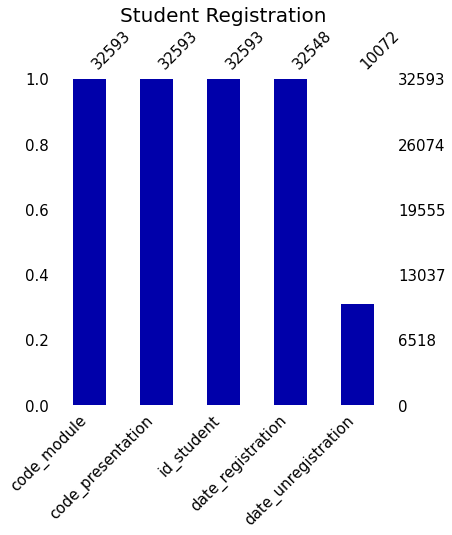

In [12]:
msno.bar(student_reg, figsize=(6,6), fontsize=15,color = "#0000AA")
plt.title('Student Registration',fontsize=20)

Text(0.5, 1.0, 'Student VLE')

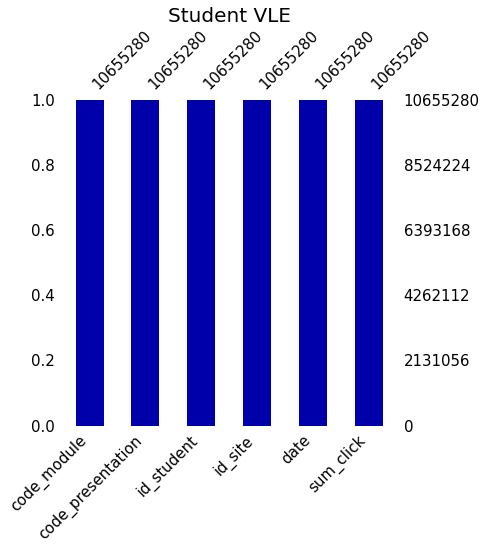

In [13]:
msno.bar(student_vle, figsize=(6,6), fontsize=15,color = "#0000AA")
plt.title('Student VLE',fontsize=20)

Text(0.5, 1.0, 'VLE')

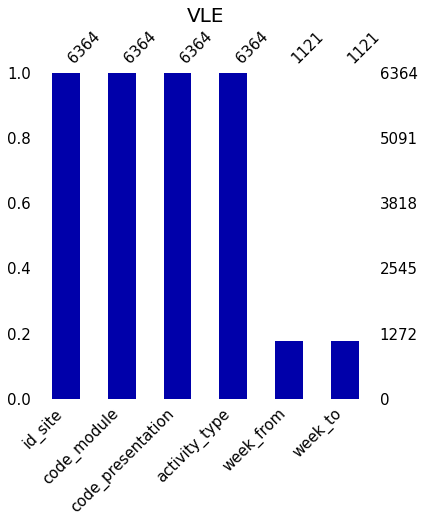

In [14]:
msno.bar(vle, figsize=(6,6), fontsize=15,color = "#0000AA")
plt.title('VLE',fontsize=20)

In [15]:
# The module is always identified with Code module and code presentation.
# Hence, a new feature called 'module_presentation' would be created with the combination of the above two columns

course["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), course.code_module, course.code_presentation))
assessment["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), assessment.code_module, assessment.code_presentation))
vle["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), vle.code_module, vle.code_presentation))
student_info["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), student_info.code_module, student_info.code_presentation))
student_reg["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), student_reg.code_module, student_reg.code_presentation))
student_vle["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), student_vle.code_module, student_vle.code_presentation))


In [16]:
group1 = list(assessment.columns.values)
group2 = list(course.columns.values)
group3 = list(student_assessment.columns.values)
group4 = list(student_info.columns.values)
group5 = list(student_reg.columns.values)
group6 = list(student_vle.columns.values)
group7 = list(vle.columns.values)

In [17]:
all_features = [group1, group2, group3, group4, group5, group6, group7]
feature_count = [assessment.shape,course.shape,student_assessment.shape, student_info.shape, student_reg.shape, student_vle.shape, vle.shape]
feature_header = ['assessment', 'course', 'student_assessment', 'student_info', 'student_reg', 'student_vle', 'vle' ]

In [18]:
d = {'Table Name':feature_header,'Rows, Columns': feature_count,'Feature Names':all_features}
df = pd.set_option('max_colwidth', 200)
df = pd.DataFrame(d)
df

,Table Name,"Rows, Columns",Feature Names
0,assessment,"(206, 7)","[code_module, code_presentation, id_assessment, assessment_type, date, weight, module_presentation]"
1,course,"(22, 4)","[code_module, code_presentation, module_presentation_length, module_presentation]"
2,student_assessment,"(173912, 5)","[id_assessment, id_student, date_submitted, is_banked, score]"
3,student_info,"(32593, 13)","[code_module, code_presentation, id_student, gender, region, highest_education, imd_band, age_band, num_of_prev_attempts, studied_credits, disability, final_result, module_presentation]"
4,student_reg,"(32593, 6)","[code_module, code_presentation, id_student, date_registration, date_unregistration, module_presentation]"
5,student_vle,"(10655280, 7)","[code_module, code_presentation, id_student, id_site, date, sum_click, module_presentation]"
6,vle,"(6364, 7)","[id_site, code_module, code_presentation, activity_type, week_from, week_to, module_presentation]"


# Dropping Missing Values

Many entries in the 'week_from' and 'week_to' are missing. Therefore, these columns would be be dropped from the dataset

In [19]:
vle.drop(columns=['week_from','week_to'],inplace=True)

<AxesSubplot:>

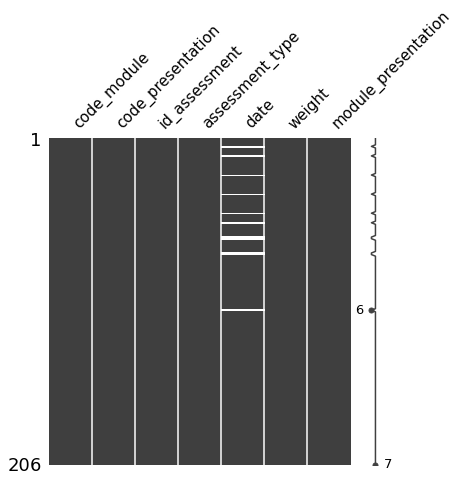

In [20]:
msno.matrix(assessment, figsize=(6,6), fontsize=15)

Text(0.5, 1.0, 'Student Registration')

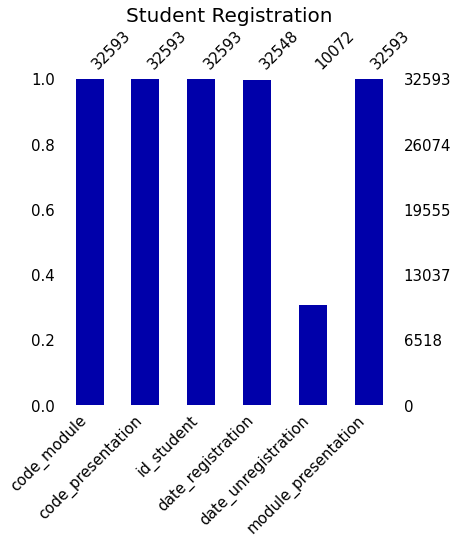

In [21]:
msno.bar(student_reg, figsize=(6,6), fontsize=15,color = "#0000AA")
plt.title('Student Registration',fontsize=20)

From the graph above, 70% of the rows are not containing data for date_unregistration. This indicates that 70% of the students don't withdraw from the modules.

# Check the consistency between Final Result and Unregistration in the Dataset

In [22]:
# To check the consistency of the students who are unregistered with the final result. 
# If a student is unregistered according to the registered table, then the final result must be withdrawn.


temp = student_reg.loc[student_reg.date_unregistration.notna(),['id_student','module_presentation','date_unregistration']]

# Join to see matching rows
temp =pd.merge(student_info, temp, on=['id_student','module_presentation'])

# Unregistered students without a "Withdrawn" in final result column 
# Semantic Error -- If a student unregistered, have to have "Withdrawn" as final result! 
wrong_final_results=temp.loc[temp.final_result!='Withdrawn']
incorrect_final_results=wrong_final_results.index
wrong_final_results

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation,date_unregistration
719,BBB,2013J,362907,F,South West Region,Lower Than A Level,20-30%,35-55,2,60,N,Fail,BBB_2013J,0.0
724,BBB,2013J,365288,F,South Region,A Level or Equivalent,70-80%,0-35,0,60,N,Fail,BBB_2013J,0.0
869,BBB,2013J,554243,F,South West Region,Lower Than A Level,60-70%,0-35,0,60,N,Fail,BBB_2013J,166.0
4961,DDD,2013J,315082,M,West Midlands Region,A Level or Equivalent,50-60%,0-35,0,60,N,Fail,DDD_2013J,0.0
5010,DDD,2013J,403052,F,Yorkshire Region,HE Qualification,20-30%,0-35,0,150,N,Fail,DDD_2013J,0.0
5293,DDD,2013J,582954,M,London Region,Lower Than A Level,10-20,0-35,0,120,N,Fail,DDD_2013J,-7.0
7853,FFF,2013J,234004,M,Yorkshire Region,A Level or Equivalent,50-60%,0-35,0,60,N,Fail,FFF_2013J,0.0
8001,FFF,2013J,523777,M,North Region,A Level or Equivalent,0-10%,35-55,1,60,N,Fail,FFF_2013J,0.0
8340,FFF,2013J,601640,M,London Region,HE Qualification,20-30%,0-35,0,90,N,Fail,FFF_2013J,-4.0


8 of these 9 students unregistered at the first day of the module presentation or earlier (by looking date_unregistration column), this may be a cause for that inconsistency.
This also makes a "Fail" impossible as a final result. The above 9 records' final_result entry will be changed into Withdrawn in the next step.

In [23]:
# Correction student info table for final_result entries

for i in wrong_final_results[['id_student','code_module','code_presentation']].values:
    student_info.loc[(student_info.id_student==i[0])&(student_info.code_module==i[1])&\
                 (student_info.code_presentation==i[2]),'final_result'] = 'Withdrawn'

# Cleaning The Data

In [24]:
# Dropping all the missing values
assessment.dropna(inplace=True)
course.dropna(inplace=True)
student_assessment.dropna(inplace=True)
student_info.dropna(inplace=True)
student_reg.dropna(inplace=True)
student_vle.dropna(inplace=True)
vle.dropna(inplace=True)

# Exploratory Data Analysis

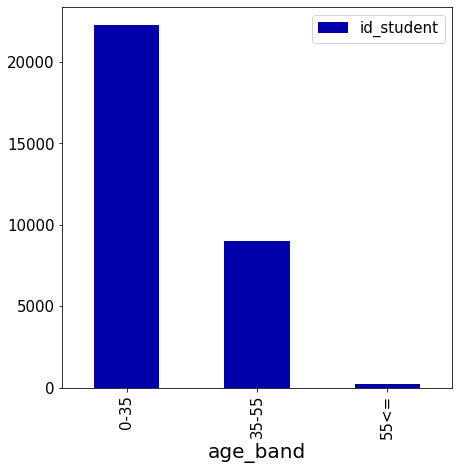

In [25]:
student_info[['id_student', 'age_band']].groupby(by='age_band').count().plot.bar(figsize=(7,7), fontsize=15,color = "#0000AA");    #this shows majority of students fall in age band of 0-35
plt.xlabel('age_band',fontsize=20)
plt.legend(prop={'size': 15})

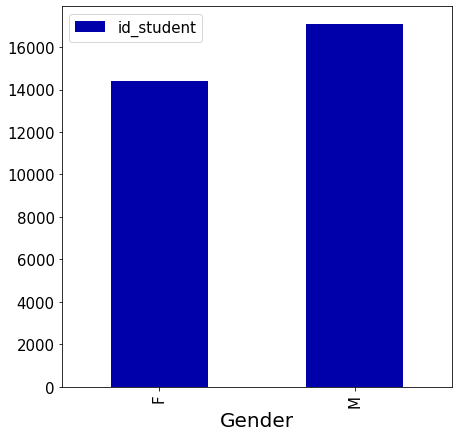

In [26]:
student_info[['id_student', 'gender']].groupby(by='gender').count().plot.bar(figsize=(7,7), fontsize=15,color = "#0000AA");    #this shows majority of students fall in age band of 0-35
plt.xlabel('Gender',fontsize=20)
plt.legend(prop={'size': 15})

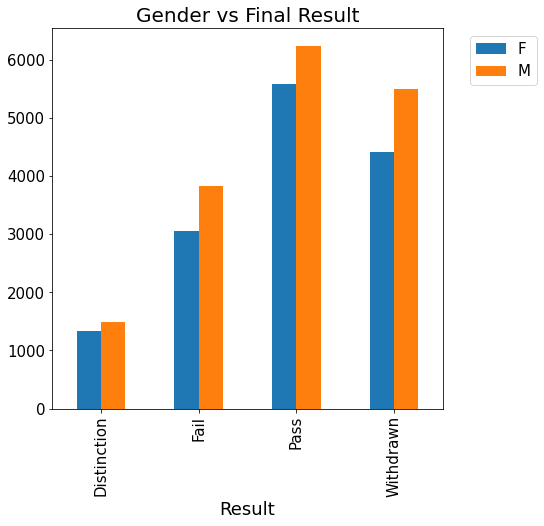

In [27]:
student_info.groupby(['final_result','gender']).size().unstack().plot(kind='bar',stacked=False,figsize=(7,7),fontsize=15)
#plt.ylabel('Region',fontsize=18)
plt.xlabel('Result',fontsize=18)
plt.title('Gender vs Final Result',fontsize=20)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.85))
plt.legend(prop={'size': 15},bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

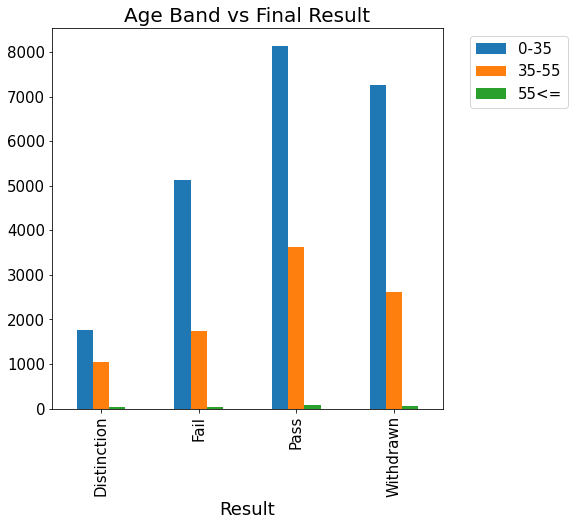

In [28]:
student_info.groupby(['final_result','age_band']).size().unstack().plot(kind='bar',stacked=False,figsize=(7,7),fontsize=15)
#plt.ylabel('Region',fontsize=18)
plt.xlabel('Result',fontsize=18)
plt.title('Age Band vs Final Result',fontsize=20)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.85))
plt.legend(prop={'size': 15},bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Text(0.5, 1.0, 'Region vs Final Result')

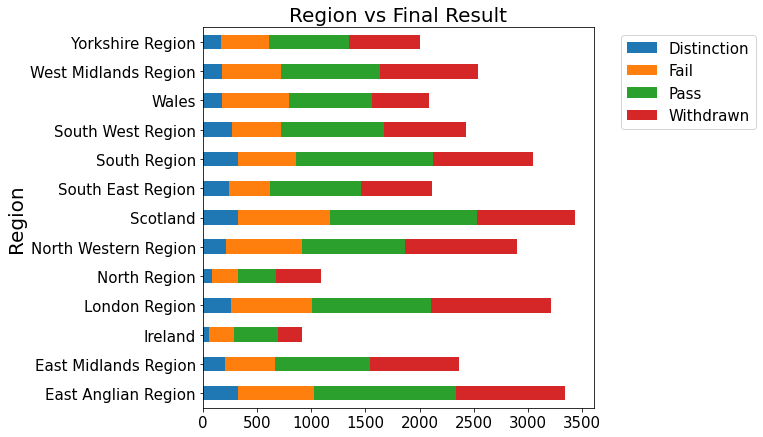

In [29]:
pd.crosstab(student_info.region, student_info.final_result).plot.barh(stacked = True,figsize=(7,7),fontsize=15);
plt.ylabel('Region',fontsize=20)
plt.legend(prop={'size': 15},bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Region vs Final Result',fontsize=20)

Text(0.5, 1.0, 'IMD Band vs Final Result')

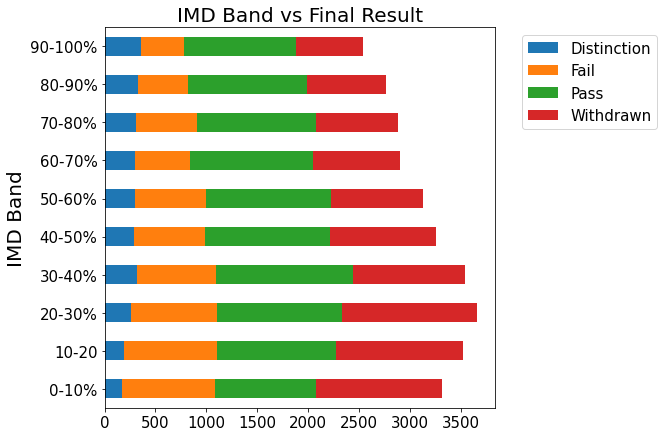

In [30]:
pd.crosstab(student_info.imd_band, student_info.final_result).plot.barh(stacked = True,figsize=(7,7),fontsize=15);
plt.ylabel('IMD Band',fontsize=20)
plt.legend(prop={'size': 15},bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('IMD Band vs Final Result',fontsize=20)

Text(0.5, 1.0, 'Highest Education vs Final Result')

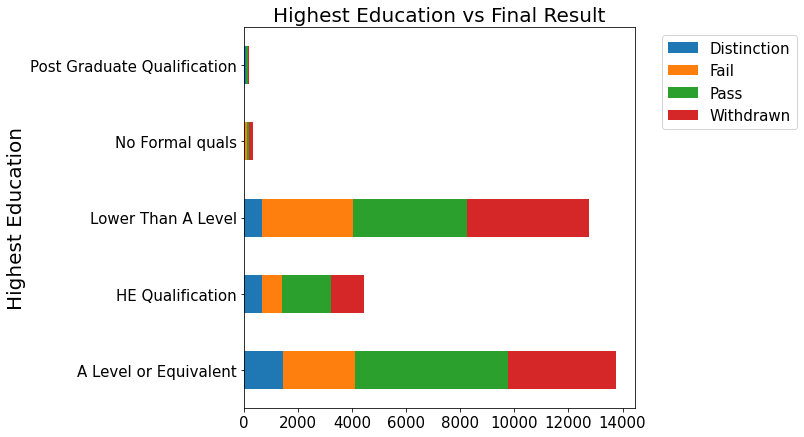

In [31]:
pd.crosstab(student_info.highest_education, student_info.final_result).plot.barh(stacked = True,figsize=(7,7),fontsize=15);
plt.ylabel('Highest Education',fontsize=20)
plt.legend(prop={'size': 15},bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Highest Education vs Final Result',fontsize=20)

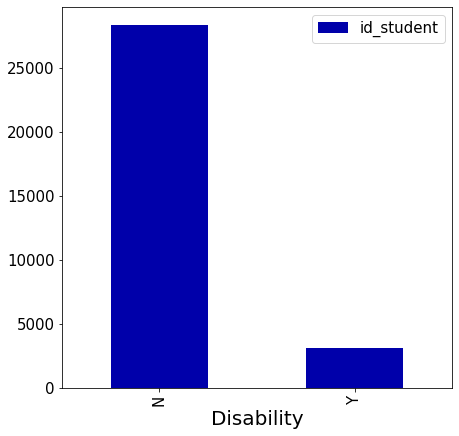

In [32]:
student_info[['id_student', 'disability']].groupby(by='disability').count().plot.bar(figsize=(7,7), fontsize=15,color = "#0000AA");    #this shows majority of students fall in age band of 0-35
plt.xlabel('Disability',fontsize=20)
plt.legend(prop={'size': 15})

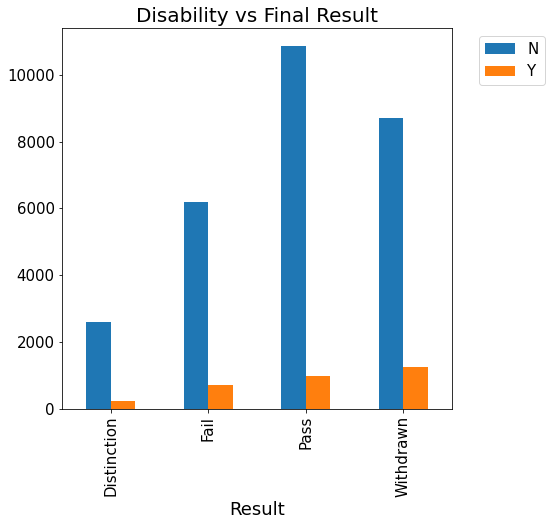

In [33]:
student_info.groupby(['final_result','disability']).size().unstack().plot(kind='bar',stacked=False,figsize=(7,7),fontsize=15)
#plt.ylabel('Region',fontsize=18)
plt.xlabel('Result',fontsize=18)
plt.title('Disability vs Final Result',fontsize=20)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.85))
plt.legend(prop={'size': 15},bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Text(0.5, 1.0, 'Code Module vs Number Of Students')

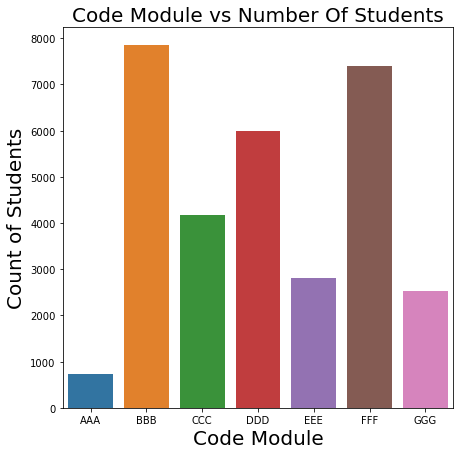

In [34]:
plt.figure(figsize=(7,7))
sns.countplot(student_info.code_module)

plt.xlabel('Code Module',fontsize=20)
plt.ylabel('Count of Students',fontsize=20)
#plt.legend(prop={'size': 15},bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Code Module vs Number Of Students',fontsize=20)

# Feature Selection

In [35]:
# creating a new column sum_of_sum_click
student_vle["sum_of_sum_click"] = student_vle.groupby(["id_student","module_presentation"])["sum_click"].transform(sum)

In [36]:
student_vle_sel=student_vle[["id_student","module_presentation", "sum_of_sum_click"]]

In [37]:
student_vle_sel.drop_duplicates("id_student", inplace=True)

In [38]:
student_assessment["avg_score"] = student_assessment.groupby('id_student').score.transform('mean')

In [39]:
student_assessment_sel=student_assessment[['id_assessment','id_student','date_submitted','avg_score']]

In [40]:
student_assessment_sel.drop_duplicates("id_student", inplace=True)

In [41]:
student_info_sel=student_info[['module_presentation','id_student','highest_education','num_of_prev_attempts','studied_credits','disability','final_result']]

In [42]:
student_reg_sel=student_reg[['id_student','module_presentation','date_registration']]

In [43]:
#temp0=student_vle[['module_presentation','id_student','sum_of_sum_click']]
#temp1=student_info[['module_presentation','id_student','highest_education','num_of_prev_attempts','studied_credits','disability','final_result']]
#temp2 = student_reg[['id_student','module_presentation','date_registration','date_unregistration']]
#temp3=student_assessment[['id_assessment','id_student','date_submitted','avg_score']]
#info, assessment, vle

In [44]:
final_data=pd.merge(student_vle_sel, student_info_sel, on=['id_student','module_presentation'],how="outer")

In [45]:
final_data=pd.merge(student_assessment_sel,final_data,on=['id_student'],how='outer')

In [46]:
final_data=pd.merge(student_reg_sel,final_data,on=['id_student','module_presentation'],how='outer')

In [47]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32480 entries, 0 to 32479
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_student            32480 non-null  int64  
 1   module_presentation   32479 non-null  object 
 2   date_registration     10033 non-null  float64
 3   id_assessment         26595 non-null  float64
 4   date_submitted        26595 non-null  float64
 5   avg_score             26595 non-null  float64
 6   sum_of_sum_click      26074 non-null  float64
 7   highest_education     31482 non-null  object 
 8   num_of_prev_attempts  31482 non-null  float64
 9   studied_credits       31482 non-null  float64
 10  disability            31482 non-null  object 
 11  final_result          31482 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 3.2+ MB


In [48]:
final_data.drop_duplicates(("id_student","module_presentation"), inplace=True)

In [49]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32480 entries, 0 to 32479
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_student            32480 non-null  int64  
 1   module_presentation   32479 non-null  object 
 2   date_registration     10033 non-null  float64
 3   id_assessment         26595 non-null  float64
 4   date_submitted        26595 non-null  float64
 5   avg_score             26595 non-null  float64
 6   sum_of_sum_click      26074 non-null  float64
 7   highest_education     31482 non-null  object 
 8   num_of_prev_attempts  31482 non-null  float64
 9   studied_credits       31482 non-null  float64
 10  disability            31482 non-null  object 
 11  final_result          31482 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 3.2+ MB


In [50]:
Total_Count=final_data["module_presentation"].value_counts()
print(Total_Count)

CCC_2014J    2493
FFF_2014J    2358
BBB_2014J    2291
FFF_2013J    2274
BBB_2013J    2235
CCC_2014B    1935
DDD_2013J    1928
DDD_2014J    1792
BBB_2013B    1767
BBB_2014B    1613
FFF_2013B    1611
FFF_2014B    1489
DDD_2013B    1296
DDD_2014B    1218
EEE_2014J    1177
EEE_2013J    1036
GGG_2013J     952
GGG_2014B     833
GGG_2014J     749
EEE_2014B     684
AAA_2013J     383
AAA_2014J     365
Name: module_presentation, dtype: int64


In [51]:
final_data["final_result"].value_counts()

Pass           11830
Withdrawn       9929
Fail            6898
Distinction     2825
Name: final_result, dtype: int64

Text(0, 0.5, 'Number of Students')

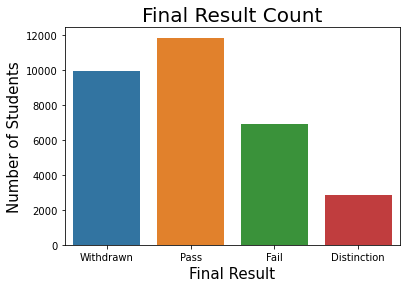

In [52]:
sns.countplot(final_data.final_result)

plt.title("Final Result Count", fontsize=20)
plt.xlabel("Final Result",fontsize=15)
plt.ylabel("Number of Students",fontsize=15)

In [53]:
final_data.describe().T 

,count,mean,std,min,25%,50%,75%,max
id_student,32480.0,706785.562161,549446.919618,3733.0,508428.750000,590242.500000,644480.0,2716795.0
date_registration,10033.0,-78.521379,53.168107,-322.0,-115.000000,-67.000000,-32.0,167.0
id_assessment,26595.0,25571.674976,8607.892023,1752.0,15020.000000,25348.000000,34873.0,37438.0
date_submitted,26595.0,25.914232,17.381636,-11.0,18.000000,22.000000,31.0,241.0
avg_score,26595.0,72.806651,15.569920,0.0,64.783626,75.714286,84.0,100.0
sum_of_sum_click,26074.0,1343.395950,1742.184386,1.0,257.000000,719.000000,1738.0,24139.0
num_of_prev_attempts,31482.0,0.164507,0.482633,0.0,0.000000,0.000000,0.0,6.0
studied_credits,31482.0,79.767804,41.049455,30.0,60.000000,60.000000,120.0,655.0


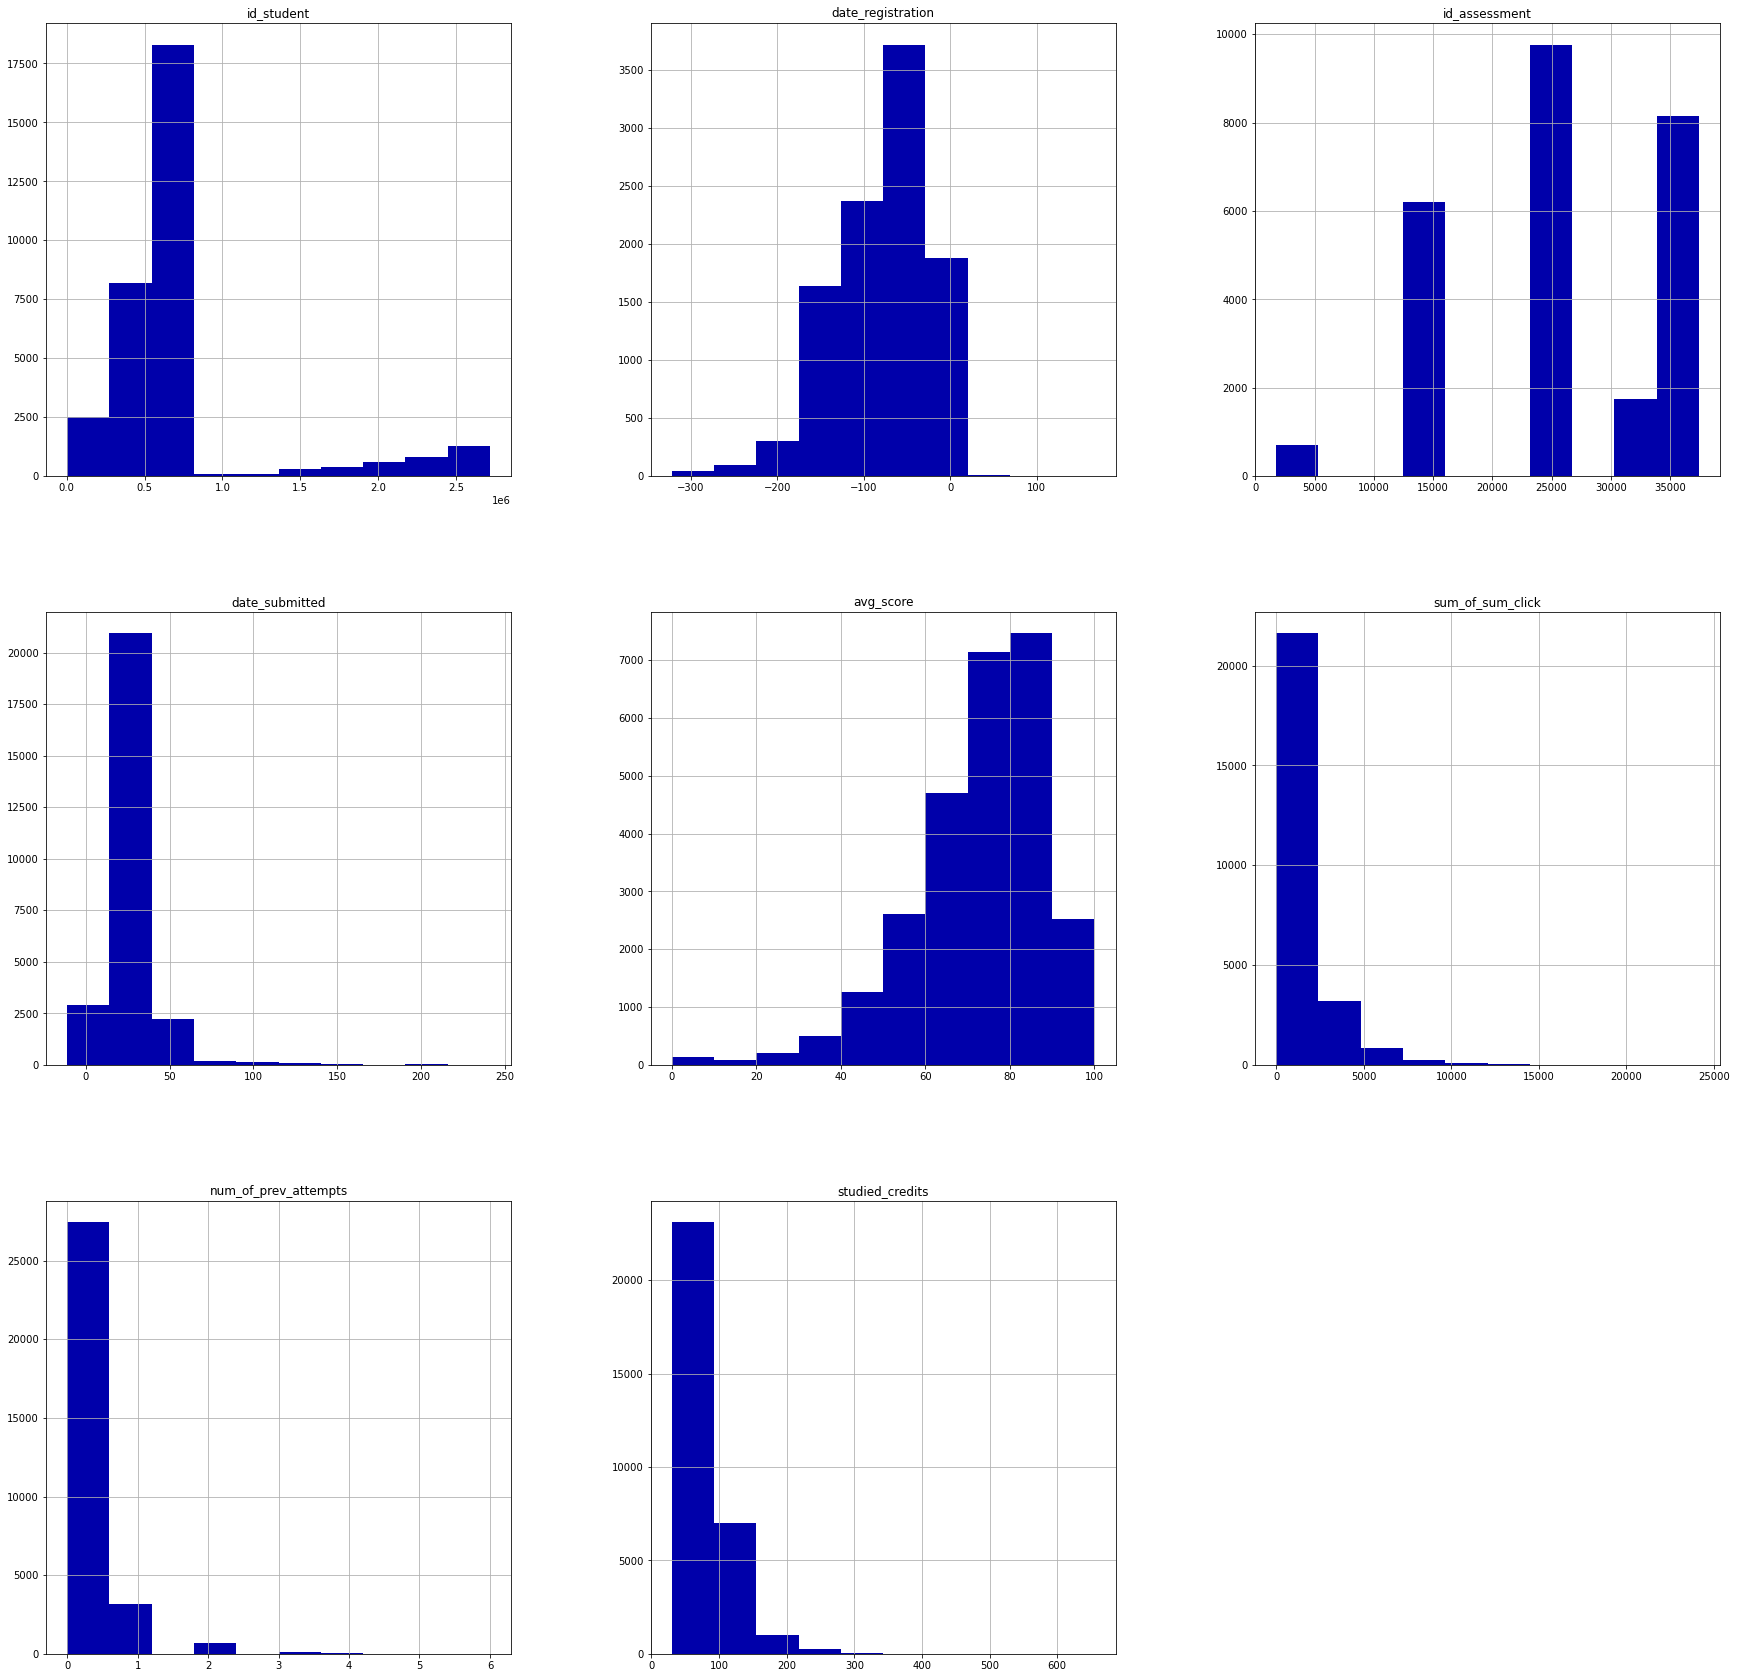

In [54]:
final_data_histogram = final_data.hist(figsize = (30,30), color = "#0000AA") #Plot histograms for all selected features

# Normalizing the dataset

In [55]:
def changeData(inputDataFrame, columnName, removeString, replaceString):
	inputDataFrame[columnName] = inputDataFrame[columnName].str.replace(removeString, replaceString)
	return inputDataFrame

In [56]:
# convert NaNs to proper data data
def resolveNANs(inputDataFrame):
	for columnName in inputDataFrame.columns:
		if inputDataFrame[columnName].dtype == "object":
			inputDataFrame[columnName] = inputDataFrame[columnName].fillna("Nothing")
		elif inputDataFrame[columnName].dtype == "int64":
			inputDataFrame[columnName] = inputDataFrame[columnName].fillna(0)
		elif inputDataFrame[columnName].dtype == "float64":
			inputDataFrame[columnName] = inputDataFrame[columnName].fillna(0.0)
	return inputDataFrame

In [57]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32480 entries, 0 to 32479
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_student            32480 non-null  int64  
 1   module_presentation   32479 non-null  object 
 2   date_registration     10033 non-null  float64
 3   id_assessment         26595 non-null  float64
 4   date_submitted        26595 non-null  float64
 5   avg_score             26595 non-null  float64
 6   sum_of_sum_click      26074 non-null  float64
 7   highest_education     31482 non-null  object 
 8   num_of_prev_attempts  31482 non-null  float64
 9   studied_credits       31482 non-null  float64
 10  disability            31482 non-null  object 
 11  final_result          31482 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 4.2+ MB


In [58]:
final_data=changeData(final_data, "disability", "N", "1")
final_data=changeData(final_data, "disability", "Y", "2")

final_data=changeData(final_data, "final_result", "Fail", "1")
final_data=changeData(final_data, "final_result", "Withdrawn", "2")
final_data=changeData(final_data, "final_result", "Pass", "3")
final_data=changeData(final_data, "final_result", "Distinction", "4")

final_data=changeData(final_data, "highest_education", "No Formal quals", "1")
final_data=changeData(final_data, "highest_education", "Lower Than A Level", "2")
final_data=changeData(final_data, "highest_education", "A Level or Equivalent", "3")
final_data=changeData(final_data, "highest_education", "HE Qualification", "4")
final_data=changeData(final_data, "highest_education", "Post Graduate Qualification", "5")


final_data=changeData(final_data, "module_presentation", "AAA_2013J", "1")
final_data=changeData(final_data, "module_presentation", "AAA_2014J", "2")

final_data=changeData(final_data, "module_presentation", "BBB_2013B", "3")
final_data=changeData(final_data, "module_presentation", "BBB_2013J", "4")
final_data=changeData(final_data, "module_presentation", "BBB_2014B", "5")
final_data=changeData(final_data, "module_presentation", "BBB_2014J", "6")


final_data=changeData(final_data, "module_presentation", "CCC_2014B", "7")
final_data=changeData(final_data, "module_presentation", "CCC_2014J", "8")

final_data=changeData(final_data, "module_presentation", "DDD_2013B", "9")
final_data=changeData(final_data, "module_presentation", "DDD_2013J", "10")
final_data=changeData(final_data, "module_presentation", "DDD_2014B", "11")
final_data=changeData(final_data, "module_presentation", "DDD_2014J", "12")


final_data=changeData(final_data, "module_presentation", "EEE_2013J", "13")
final_data=changeData(final_data, "module_presentation", "EEE_2014B", "14")
final_data=changeData(final_data, "module_presentation", "EEE_2014J", "15")

final_data=changeData(final_data, "module_presentation", "FFF_2013B", "16")
final_data=changeData(final_data, "module_presentation", "FFF_2013J", "17")
final_data=changeData(final_data, "module_presentation", "FFF_2014B", "18")
final_data=changeData(final_data, "module_presentation", "FFF_2014J", "19")

final_data=changeData(final_data, "module_presentation", "GGG_2013J", "20")
final_data=changeData(final_data, "module_presentation", "GGG_2014B", "21")
final_data=changeData(final_data, "module_presentation", "GGG_2014J", "22")



In [59]:
final_data["disability"] = pd.to_numeric(final_data["disability"])
final_data["final_result"] = pd.to_numeric(final_data["final_result"])
final_data["highest_education"] = pd.to_numeric(final_data["highest_education"])
final_data["module_presentation"] = pd.to_numeric(final_data["module_presentation"])

In [60]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32480 entries, 0 to 32479
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_student            32480 non-null  int64  
 1   module_presentation   32479 non-null  float64
 2   date_registration     10033 non-null  float64
 3   id_assessment         26595 non-null  float64
 4   date_submitted        26595 non-null  float64
 5   avg_score             26595 non-null  float64
 6   sum_of_sum_click      26074 non-null  float64
 7   highest_education     31482 non-null  float64
 8   num_of_prev_attempts  31482 non-null  float64
 9   studied_credits       31482 non-null  float64
 10  disability            31482 non-null  float64
 11  final_result          31482 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 4.2 MB


In [61]:
final_data.drop(columns=['id_assessment'],inplace=True)

In [62]:
final_data.head(5)

,id_student,module_presentation,date_registration,date_submitted,avg_score,sum_of_sum_click,highest_education,num_of_prev_attempts,studied_credits,disability,final_result
0,30268,1.0,-92.0,NaN,NaN,281.0,3.0,0.0,60.0,2.0,2.0
1,65002,1.0,-180.0,17.0,67.000000,171.0,3.0,0.0,60.0,1.0,2.0
2,94961,1.0,-170.0,17.0,65.333333,339.0,2.0,0.0,60.0,1.0,2.0
3,106247,1.0,5.0,32.0,60.000000,465.0,4.0,0.0,60.0,1.0,2.0
4,129955,1.0,-197.0,18.0,81.000000,1011.0,3.0,0.0,60.0,1.0,2.0


# Build Predictive Models

In [63]:
final_data = resolveNANs(final_data)

In [64]:
final_data.head(5)

,id_student,module_presentation,date_registration,date_submitted,avg_score,sum_of_sum_click,highest_education,num_of_prev_attempts,studied_credits,disability,final_result
0,30268,1.0,-92.0,0.0,0.000000,281.0,3.0,0.0,60.0,2.0,2.0
1,65002,1.0,-180.0,17.0,67.000000,171.0,3.0,0.0,60.0,1.0,2.0
2,94961,1.0,-170.0,17.0,65.333333,339.0,2.0,0.0,60.0,1.0,2.0
3,106247,1.0,5.0,32.0,60.000000,465.0,4.0,0.0,60.0,1.0,2.0
4,129955,1.0,-197.0,18.0,81.000000,1011.0,3.0,0.0,60.0,1.0,2.0


In [65]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32480 entries, 0 to 32479
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_student            32480 non-null  int64  
 1   module_presentation   32480 non-null  float64
 2   date_registration     32480 non-null  float64
 3   date_submitted        32480 non-null  float64
 4   avg_score             32480 non-null  float64
 5   sum_of_sum_click      32480 non-null  float64
 6   highest_education     32480 non-null  float64
 7   num_of_prev_attempts  32480 non-null  float64
 8   studied_credits       32480 non-null  float64
 9   disability            32480 non-null  float64
 10  final_result          32480 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 4.0 MB


In [66]:
final_data['final_result'].value_counts()

3.0    11830
2.0     9929
1.0     6898
4.0     2825
0.0      998
Name: final_result, dtype: int64

In [67]:
final_data.drop(final_data[final_data.final_result == 0.0].index, inplace=True)

In [68]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31482 entries, 0 to 32479
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_student            31482 non-null  int64  
 1   module_presentation   31482 non-null  float64
 2   date_registration     31482 non-null  float64
 3   date_submitted        31482 non-null  float64
 4   avg_score             31482 non-null  float64
 5   sum_of_sum_click      31482 non-null  float64
 6   highest_education     31482 non-null  float64
 7   num_of_prev_attempts  31482 non-null  float64
 8   studied_credits       31482 non-null  float64
 9   disability            31482 non-null  float64
 10  final_result          31482 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 2.9 MB


In [69]:
final_data['final_result'].value_counts()

3.0    11830
2.0     9929
1.0     6898
4.0     2825
Name: final_result, dtype: int64

In [70]:
columns=['id_student', 'module_presentation','date_registration', 'date_submitted','avg_score', 'sum_of_sum_click','highest_education','num_of_prev_attempts','studied_credits','disability']

In [71]:
scale_X = StandardScaler()
#X = final_data.loc[:, final_data.columns != 'final_result']
X=  pd.DataFrame(scale_X.fit_transform(final_data.drop(['final_result'],axis = 1),), columns = columns)
y = final_data['final_result']
xTrain, xTest, yTrain, yTest = train_test_split(X, y,train_size = 0.70,shuffle=True)

In [72]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31482 entries, 0 to 32479
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_student            31482 non-null  int64  
 1   module_presentation   31482 non-null  float64
 2   date_registration     31482 non-null  float64
 3   date_submitted        31482 non-null  float64
 4   avg_score             31482 non-null  float64
 5   sum_of_sum_click      31482 non-null  float64
 6   highest_education     31482 non-null  float64
 7   num_of_prev_attempts  31482 non-null  float64
 8   studied_credits       31482 non-null  float64
 9   disability            31482 non-null  float64
 10  final_result          31482 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 2.9 MB


In [73]:
final_data['final_result'].value_counts()

3.0    11830
2.0     9929
1.0     6898
4.0     2825
Name: final_result, dtype: int64

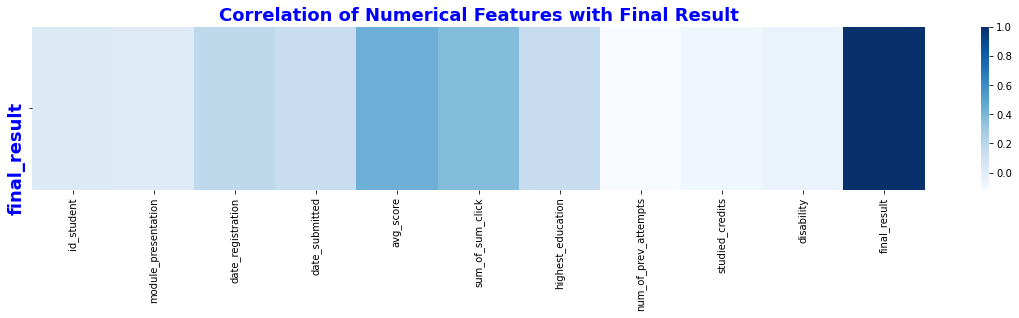

In [74]:
numeric_data = final_data.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()
f,ax=plt.subplots(figsize=(20,3))
sns.heatmap(numeric_corr.sort_values(by=["final_result"], ascending=False).head(1), cmap="Blues")
plt.title("Correlation of Numerical Features with Final Result", weight="bold", fontsize=18, color="blue")
plt.yticks(weight="bold", color="blue",fontsize=18)
plt.show()

In [75]:
numerical_feature = numeric_corr["final_result"].sort_values(ascending=False).head(20).to_frame()
correlation_display = numerical_feature.style.background_gradient(cmap="Blues")
correlation_display

,final_result
final_result,1.000000
avg_score,0.436766
sum_of_sum_click,0.373714
date_registration,0.191258
highest_education,0.156742
date_submitted,0.147096
id_student,0.034045
module_presentation,0.022444
disability,-0.041371
studied_credits,-0.074657


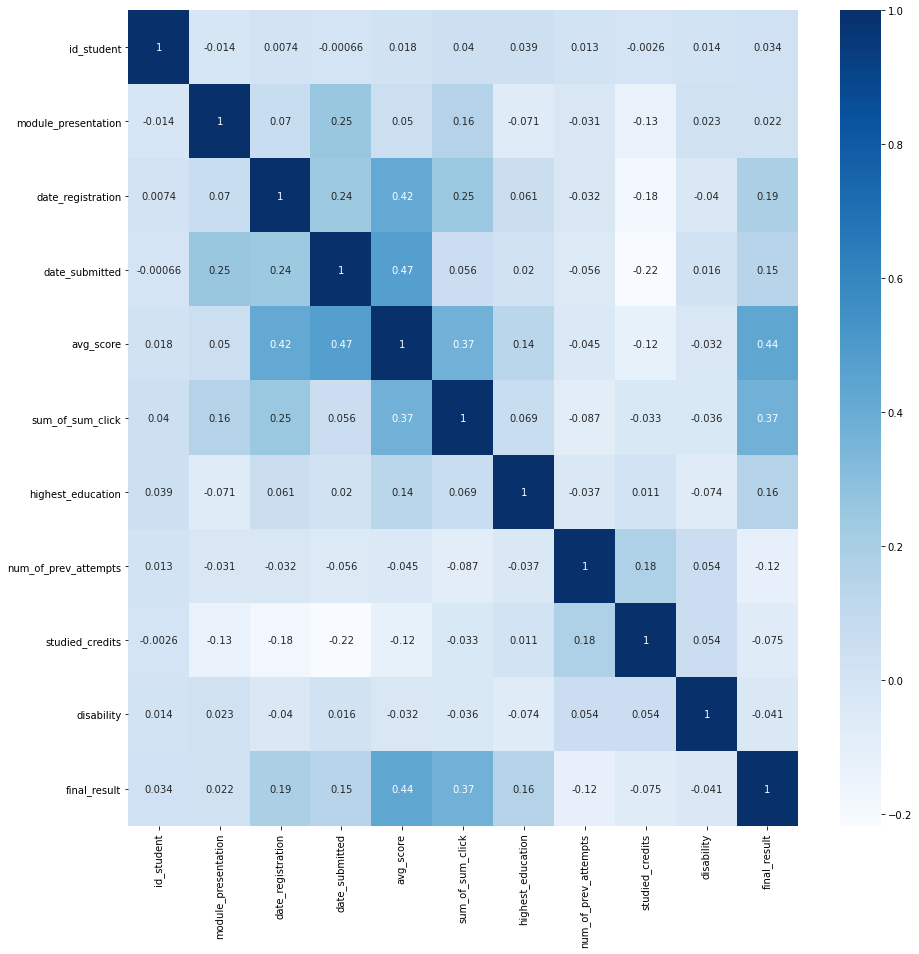

In [76]:
correlation_matrix=final_data.corr() 

#Correlation Heatmap

plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues")
plt.show()

# K-Nearest Neighbors (KNN) Classifier

In [77]:
# Base classification model of KNN with default parameters:

KNN_model_n = KNeighborsClassifier()
KNN_model_n = KNN_model_n.fit(xTrain, yTrain)
    
print(f"Test Score for K-Nearest Neighbors:{round(KNN_model_n.score(xTest, yTest),3)}")
print(f"Train Score K-Nearest Neighbors: {round(KNN_model_n.score(xTrain, yTrain),3)}")
y_pred_n = KNN_model_n.predict(xTest)
print(f"Accuracy score K-Nearest Neighbors: {round(accuracy_score(yTest, y_pred_n), 3)}")

Test Score for K-Nearest Neighbors:0.727
Train Score K-Nearest Neighbors: 0.815
Accuracy score K-Nearest Neighbors: 0.727


In [78]:
# Defining Cross Validation method for K-Nearest Neighbors model
cv_method = StratifiedKFold(n_splits=3)

In [79]:
#Cross Validate K-Nearest Neighbor model 

KNN_scores = cross_val_score(KNN_model_n, xTrain, yTrain, cv = cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Cross Validation Scores for K-Nearest Neighbors :\n{KNN_scores}")
print(f"Cross Validation Means for K-Nearest Neighbors : {round(KNN_scores.mean(), 3)}")
print(f"Cross Validation Standard Deviation for K-Nearest Neighbors : {round(KNN_scores.std(), 3)}")

Cross Validation Scores for K-Nearest Neighbors :
[0.7144024  0.72338688 0.7241661 ]
Cross Validation Means for K-Nearest Neighbors : 0.721
Cross Validation Standard Deviation for K-Nearest Neighbors : 0.004


In [80]:
#Defining parameter for Hyperparameter Tuning for RandomizedSearchCV
param_KNN = {"leaf_size": list(range(1,30)),
              "n_neighbors": list(range(1,22)),
              "p": [1,2]
             }

Hyperparameter Tuning for KNN model using RandomizedSearchCV method

In [81]:
KNN_random = RandomizedSearchCV(estimator=KNeighborsClassifier(), 
                                param_distributions=param_KNN, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=2,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [82]:
# Fit model with train data
KNN_random=KNN_random.fit(xTrain, yTrain);

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [83]:
y_pred = KNN_random.predict(xTest)
print(f"Best estimator for KNN model for RandomizedCV Hyperparameter Tuning : {KNN_random.best_estimator_}")
print(f"Best parameter values for KNN model for RandomizedSearchCV Hyperparameter Tuning : {KNN_random.best_params_}")
print(f"Best score for KNN model for RandomizedSearchCV Hyperparameter Tuning : {round(KNN_random.best_score_, 3)}")
print(f"Accuracy score for KNN model for RandomizedSearchCV Hyperparameter Tuning : {round(accuracy_score(yTest,y_pred), 3)}")

Best estimator for KNN model for RandomizedCV Hyperparameter Tuning : KNeighborsClassifier(leaf_size=28, n_neighbors=16, p=1)
Best parameter values for KNN model for RandomizedSearchCV Hyperparameter Tuning : {'p': 1, 'n_neighbors': 16, 'leaf_size': 28}
Best score for KNN model for RandomizedSearchCV Hyperparameter Tuning : 0.742
Accuracy score for KNN model for RandomizedSearchCV Hyperparameter Tuning : 0.734


In [86]:
param_knn_new = {"leaf_size": [28],
              "n_neighbors": [16],
              "p": [1]}

In [87]:
# Applying randomized search with the best parameter set and estimator

KNN_final = RandomizedSearchCV(estimator=KNeighborsClassifier(), 
                                param_distributions=param_knn_new, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=-1,
                                scoring="accuracy", 
                                return_train_score=True
                                )

KNN_final=KNN_final.fit(xTrain, yTrain);

y_pred_knn = KNN_final.predict(xTest)

KNN_mse = mean_squared_error(yTest, y_pred_knn)
KNN_rmse = np.sqrt(mean_squared_error(yTest, y_pred_knn))
KNN_train_score = KNN_final.score(xTrain, yTrain)
KNN_test_score = KNN_final.score(xTest, yTest)
KNN_best_score= KNN_final.best_score_
KNN_accuracy_score=accuracy_score(yTest, y_pred_knn)


print(f"Mean Square Error for K-Nearest Neighbors = {round(KNN_mse, 3)}")
print(f"Root Mean Square Error for K-Nearest Neighbors = {round(KNN_rmse, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(KNN_train_score, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(KNN_test_score, 3)}")
print(f"Accuracy Score for K-Nearest Neigbors model = {round(KNN_accuracy_score, 3)}")
print(f"Best Score for K-Nearest Neighbors model = {round(KNN_best_score, 3)}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mean Square Error for K-Nearest Neighbors = 0.699
Root Mean Square Error for K-Nearest Neighbors = 0.836
R^2(coefficient of determination) on training set = 0.773
R^2(coefficient of determination) on testing set = 0.734
Accuracy Score for K-Nearest Neigbors model = 0.734
Best Score for K-Nearest Neighbors model = 0.742


In [88]:
print("Classification Report")
print(classification_report(yTest, y_pred_knn))

Classification Report
              precision    recall  f1-score   support

         1.0       0.67      0.55      0.61      2147
         2.0       0.99      0.87      0.92      2892
         3.0       0.63      0.88      0.73      3538
         4.0       0.63      0.15      0.24       868

    accuracy                           0.73      9445
   macro avg       0.73      0.61      0.63      9445
weighted avg       0.75      0.73      0.72      9445



In [89]:
print("Confusion Matrix:")
print(confusion_matrix(yTest, y_pred_knn))

Confusion Matrix:
[[1186   33  922    6]
 [ 197 2518  173    4]
 [ 370    3 3101   64]
 [  19    0  722  127]]


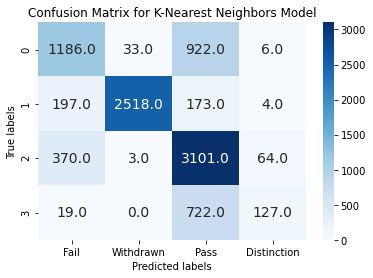

<Figure size 720x288 with 0 Axes>

In [90]:
cm_plot= plt.subplot()
sns.heatmap(confusion_matrix(yTest, y_pred_knn), annot=True, ax = cm_plot, cmap = "Blues",fmt=".1f",annot_kws={"size": 14});

# labels, title and ticks
plt.figure(figsize=(10,4))
cm_plot.set_xlabel("Predicted labels");
cm_plot.set_ylabel("True labels"); 
cm_plot.set_title("Confusion Matrix for K-Nearest Neighbors Model"); 
cm_plot.xaxis.set_ticklabels(["Fail", "Withdrawn", "Pass","Distinction"]);

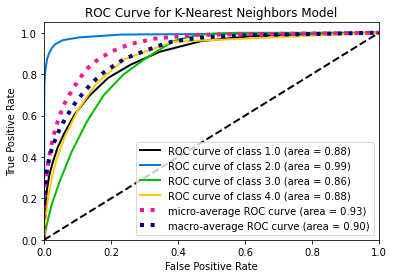

In [91]:
y_probas_knn=KNN_final.predict_proba(xTest)
skplt.metrics.plot_roc_curve(yTest,y_probas_knn,title='ROC Curve for K-Nearest Neighbors Model' )
plt.show()

# Gradient Boosting Classifier

In [92]:
# Baseline model of gradient boosting classifier with default parameters:
GB_model_n = GradientBoostingClassifier()
GB_model_n = GB_model_n.fit(xTrain, yTrain)

print(f"Test Score Gradient Boosting Classsifier :{round(GB_model_n.score(xTest, yTest),3)}")
print(f"Train Score Gradient Boosting Classifier : {round(GB_model_n.score(xTrain, yTrain),3)}")
y_pred_n = GB_model_n.predict(xTest)
print(f"Accuracy score Gradient Boosting Classifier : {round(accuracy_score(yTest, y_pred_n), 3)}")

Test Score Gradient Boosting Classsifier :0.814
Train Score Gradient Boosting Classifier : 0.834
Accuracy score Gradient Boosting Classifier : 0.814


In [93]:
#Defining Cross Validation method
cv_method = StratifiedKFold(n_splits=2)

In [94]:
# Cross validate Gradient Boosting Clasifier model
GB_scores = cross_val_score(GB_model_n, xTrain, yTrain, cv =cv_method, n_jobs = 2, scoring = "accuracy")

In [95]:
print(f"Cross Validation Scores for Gradient Boosting Classifier model:\n{GB_scores}")
print(f"Cross Validation Means for Gradient Boosting Classifier model: {round(GB_scores.mean(), 3)}")
print(f"Cross Validation Standard Deviation for Gradient Boosting Classifier Model: {round(GB_scores.std(), 3)}")

Cross Validation Scores for Gradient Boosting Classifier model:
[0.81631727 0.81512071]
Cross Validation Means for Gradient Boosting Classifier model: 0.816
Cross Validation Standard Deviation for Gradient Boosting Classifier Model: 0.001


In [96]:
#Defining parameter set for Hyperparameter Tuning for RandomizedSearchCV


param_GB = {"loss": ["deviance"],
              "learning_rate": [0.25, 0.5, 0.75, 1], 
              "n_estimators": [250, 300],
              "max_depth": [3, 5, 8]
              }

Hyperparamter Tuning using RandomizedSearch

In [97]:
GB_random = RandomizedSearchCV(estimator=GradientBoostingClassifier(), 
                                param_distributions=param_GB, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=2,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [98]:
GB_random = GB_random.fit(xTrain,yTrain)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


In [99]:
y_pred = GB_random.predict(xTest)
print(f"Best estimator for Gradient Boosting model for RandomizedCV Hyperparameter Tuning : {GB_random.best_estimator_}")
print(f"Best parameter values for Gradient Boosting model for RandomizedSearchCV Hyperparameter Tuning : {GB_random.best_params_}")
print(f"Best score for Gradient Boosting model for RandomizedSearchCV Hyperparameter Tuning : {round(GB_random.best_score_, 3)}")
print(f"Accuracy score for Gradient Boosting model for RandomizedSearchCV Hyperparameter Tuning : {round(accuracy_score(yTest,y_pred), 3)}")


Best estimator for Gradient Boosting model for RandomizedCV Hyperparameter Tuning : GradientBoostingClassifier(learning_rate=0.25, n_estimators=300)
Best parameter values for Gradient Boosting model for RandomizedSearchCV Hyperparameter Tuning : {'n_estimators': 300, 'max_depth': 3, 'loss': 'deviance', 'learning_rate': 0.25}
Best score for Gradient Boosting model for RandomizedSearchCV Hyperparameter Tuning : 0.812
Accuracy score for Gradient Boosting model for RandomizedSearchCV Hyperparameter Tuning : 0.815


In [100]:
#Best estimator for Gradient Boosting model for RandomizedCV Hyperparameter Tuning : 


param_GB_n = {"loss": ["deviance"],
              "learning_rate": [0.25], 
              "n_estimators": [300],
              "max_depth": [3]
              }

In [101]:
GB_final = RandomizedSearchCV(estimator=GradientBoostingClassifier(), 
                                param_distributions=param_GB_n, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=2,
                                scoring="accuracy", 
                                return_train_score=True)


In [102]:
GB_final=GB_final.fit(xTrain, yTrain);


Fitting 2 folds for each of 1 candidates, totalling 2 fits


In [103]:
y_pred_gb = GB_final.predict(xTest)

GB_mse = mean_squared_error(yTest, y_pred_gb)
GB_rmse = np.sqrt(mean_squared_error(yTest, y_pred_gb))
GB_train_score = GB_final.score(xTrain, yTrain)
GB_test_score = GB_final.score(xTest, yTest)
GB_best_score = GB_final.best_score_
GB_accuracy_score = accuracy_score(yTest, y_pred_gb)

print(f"Mean Square Error for Gradient Boosting Classifier = {round(GB_mse, 3)}")
print(f"Root Mean Square Error for Gradient Boosting Classifier = {round(GB_rmse, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(GB_train_score, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(GB_test_score, 3)}")
print(f"Accuracy Score for LR model = {round(GB_accuracy_score, 3)}")
print(f"Best Score for LR model = {round(GB_best_score, 3)}")

Mean Square Error for Gradient Boosting Classifier = 0.544
Root Mean Square Error for Gradient Boosting Classifier = 0.738
R^2(coefficient of determination) on training set = 0.883
R^2(coefficient of determination) on testing set = 0.815
Accuracy Score for LR model = 0.815
Best Score for LR model = 0.811


In [104]:
print("Classification Report")
print(classification_report(yTest, y_pred_gb))

Classification Report
              precision    recall  f1-score   support

         1.0       0.80      0.66      0.72      2147
         2.0       1.00      0.99      0.99      2892
         3.0       0.73      0.85      0.78      3538
         4.0       0.63      0.48      0.55       868

    accuracy                           0.81      9445
   macro avg       0.79      0.74      0.76      9445
weighted avg       0.82      0.81      0.81      9445



In [105]:
print("Confusion Matrix:")
print(confusion_matrix(yTest, y_pred_gb))

Confusion Matrix:
[[1419    4  695   29]
 [  29 2856    2    5]
 [ 326    2 3001  209]
 [  10    0  439  419]]


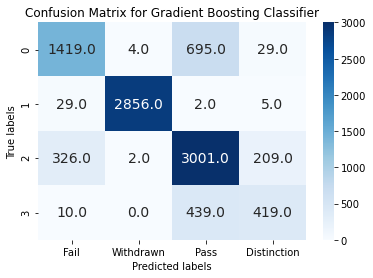

<Figure size 720x288 with 0 Axes>

In [106]:
cm_plot= plt.subplot()

sns.heatmap(confusion_matrix(yTest, y_pred_gb), annot=True, ax = cm_plot, cmap = "Blues",fmt=".1f",annot_kws={"size": 14});

plt.figure(figsize=(10,4))
cm_plot.set_xlabel("Predicted labels");
cm_plot.set_ylabel("True labels"); 
cm_plot.set_title("Confusion Matrix for Gradient Boosting Classifier"); 
cm_plot.xaxis.set_ticklabels(["Fail", "Withdrawn", "Pass","Distinction"]);

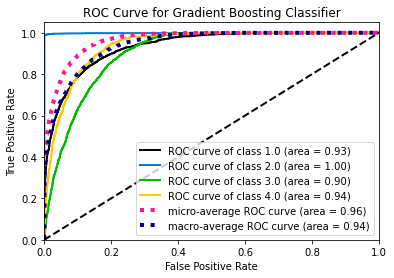

In [107]:
y_probas_gb = GB_final.predict_proba(xTest)



skplt.metrics.plot_roc_curve(yTest,y_probas_gb,title='ROC Curve for Gradient Boosting Classifier')
plt.show()

# Random Forest (RF) Classifier Algorithm

In [108]:
# Base classification model of RandomForest Classifier default parameters:

RF_model_n = RandomForestClassifier()
RF_model_n = RF_model_n.fit(xTrain, yTrain)

print(f"Test Score Random Forest Classifier:{round(RF_model_n.score(xTest, yTest),3)}")
print(f"Train Score Random Forest Classifier: {round(RF_model_n.score(xTrain, yTrain),3)}")
y_pred_n = RF_model_n.predict(xTest)
print(f"Accuracy score Random Forest Classifier: {round(accuracy_score(yTest, y_pred_n), 3)}")

Test Score Random Forest Classifier:0.809
Train Score Random Forest Classifier: 1.0
Accuracy score Random Forest Classifier: 0.809


In [109]:
#Defining Cross Validation method
cv_method = StratifiedKFold(n_splits=3)

In [110]:
# Cross validate RandomForest Classifier model
RF_scores = cross_val_score(RF_model_n, xTrain, yTrain, cv =cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Cross Validation Scores for RandomForest Classifier Model:\n{RF_scores}")
print(f"Cross Validation Means for RandomForest Classifier Model: {round(RF_scores.mean(), 3)}")
print(f"Cross Validation Standard Deviation for RandomForest Classifier Model: {round(RF_scores.std(), 3)}")

Cross Validation Scores for RandomForest Classifier Model:
[0.81255105 0.81935747 0.81061947]
Cross Validation Means for RandomForest Classifier Model: 0.814
Cross Validation Standard Deviation for RandomForest Classifier Model: 0.004


In [111]:
#Defining parameter set for Hyperparameter Tuning for RandomizedSearchCV
param_RF = {"min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16, 32],
              "n_estimators" :[100,200,300,400,500],
              "criterion": ["gini"]             
              }

Hyperparameter Tuning using RandomizedSearch

In [112]:
RF_random = RandomizedSearchCV(estimator=RandomForestClassifier(), 
                                param_distributions=param_RF, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=2,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [113]:
RF_random = RF_random.fit(xTrain,yTrain)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [114]:
y_pred = RF_random.predict(xTest)
print(f"Best estimator for RandomForest Classifier model for RandomizedCV Hyperparameter Tuning : {RF_random.best_estimator_}")
print(f"Best parameter values for RandomForest Classifier model for RandomizedSearchCV Hyperparameter Tuning : {RF_random.best_params_}")
print(f"Best score for RandomForest Classifier model for RandomizedSearchCV Hyperparameter Tuning : {round(RF_random.best_score_, 3)}")
print(f"Accuracy score for RandomForest Classifier model for RandomizedSearchCV Hyperparameter Tuning : {round(accuracy_score(yTest,y_pred), 3)}")

Best estimator for RandomForest Classifier model for RandomizedCV Hyperparameter Tuning : RandomForestClassifier(min_samples_leaf=4, min_samples_split=20,
                       n_estimators=200)
Best parameter values for RandomForest Classifier model for RandomizedSearchCV Hyperparameter Tuning : {'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 4, 'criterion': 'gini'}
Best score for RandomForest Classifier model for RandomizedSearchCV Hyperparameter Tuning : 0.818
Accuracy score for RandomForest Classifier model for RandomizedSearchCV Hyperparameter Tuning : 0.815


In [115]:
#Best estimator for RandomForest Classifier model for RandomizedSearchCV Hyperparameter Tuning 

param_RF_n = {"criterion": ['gini'],
                "min_samples_leaf":[4],
                "min_samples_split":[20],
                "n_estimators":[200]
               }

In [116]:
RF_final = GridSearchCV(estimator=RandomForestClassifier(), 
                                param_grid=param_RF_n, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=-1,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [117]:
RF_final=RF_final.fit(xTrain, yTrain);

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [118]:
y_pred_rf = RF_final.predict(xTest)

RF_mse = mean_squared_error(yTest, y_pred_rf)
RF_rmse = np.sqrt(mean_squared_error(yTest, y_pred_rf))
RF_train_score = RF_final.score(xTrain, yTrain)
RF_test_score = RF_final.score(xTest, yTest)
RF_best_score= RF_final.best_score_
RF_accuracy_score = accuracy_score(yTest, y_pred_rf)


In [119]:
print(f"Mean Square Error for Random Forest = {round(RF_mse, 3)}")
print(f"Root Mean Square Error for Random Forest = {round(RF_rmse, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(RF_train_score, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(RF_test_score, 3)}")
print(f"Accuracy Score for RandomForest model = {round(RF_accuracy_score, 3)}")
print(f"Best Score for RandomForest model = {round(RF_best_score, 3)}")

Mean Square Error for Random Forest = 0.544
Root Mean Square Error for Random Forest = 0.738
R^2(coefficient of determination) on training set = 0.883
R^2(coefficient of determination) on testing set = 0.814
Accuracy Score for RandomForest model = 0.814
Best Score for RandomForest model = 0.82


In [120]:
print("Classification Report")
print(classification_report(yTest, y_pred_rf))

Classification Report
              precision    recall  f1-score   support

         1.0       0.79      0.65      0.72      2147
         2.0       1.00      0.98      0.99      2892
         3.0       0.72      0.86      0.78      3538
         4.0       0.67      0.46      0.54       868

    accuracy                           0.81      9445
   macro avg       0.79      0.74      0.76      9445
weighted avg       0.82      0.81      0.81      9445



In [121]:
print("Confusion Matrix:")
print(confusion_matrix(yTest, y_pred_rf))

Confusion Matrix:
[[1403    0  725   19]
 [  40 2845    5    2]
 [ 318    0 3045  175]
 [  12    0  460  396]]


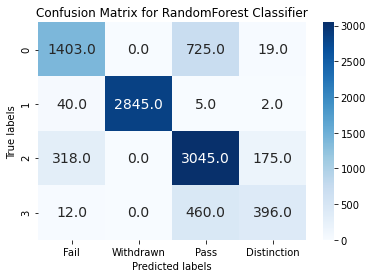

<Figure size 720x288 with 0 Axes>

In [122]:
cm_plot = plt.subplot()
sns.heatmap(confusion_matrix(yTest, y_pred_rf), annot=True, ax = cm_plot, cmap = "Blues",fmt=".1f",annot_kws={"size": 14});

plt.figure(figsize=(10,4))
# labels, title and ticks
cm_plot.set_xlabel("Predicted labels");
cm_plot.set_ylabel("True labels"); 
cm_plot.set_title("Confusion Matrix for RandomForest Classifier"); 
cm_plot.xaxis.set_ticklabels(["Fail", "Withdrawn", "Pass","Distinction"]);

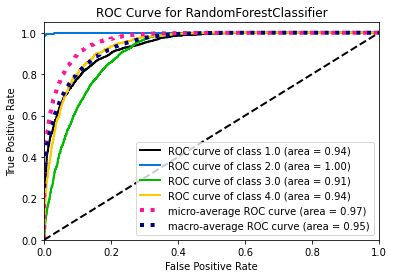

In [123]:
y_probas_rf = RF_final.predict_proba(xTest)
skplt.metrics.plot_roc_curve(yTest,y_probas_rf,title='ROC Curve for RandomForestClassifier' )
plt.show()

# Multi Layer Perceptron

In [124]:
def getAccuracy(testSet, predictions):
        correct = 0
        for x in range(len(testSet)):
                if testSet[x] == predictions[x]:
                        correct += 1
        return (correct/float(len(testSet))) * 100.0

In [125]:
dataset = final_data.values
X1 = dataset[:,0:9].astype(float)
Y1= keras.utils.to_categorical(dataset[:,9], num_classes=4)

In [126]:
seed = 7
np.random.seed(seed)

In [127]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X1, Y1, test_size=0.30, random_state=seed)

In [128]:
model=Sequential()
model.add(Dense(9, input_dim=9, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(5, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(4, activation='softmax', kernel_initializer='random_normal'))

In [129]:
model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [130]:
model.fit(xTrain,yTrain, batch_size=16, epochs=100) #fitting the model

Epoch 1/100
22037/22037 [==============================] - 4s 180us/step - loss: 0.5693 - accuracy: 0.8816
Epoch 2/100
22037/22037 [==============================] - 3s 116us/step - loss: 0.3533 - accuracy: 0.9000
Epoch 3/100
22037/22037 [==============================] - 2s 111us/step - loss: 0.3308 - accuracy: 0.9000
Epoch 4/100
22037/22037 [==============================] - 2s 110us/step - loss: 0.3272 - accuracy: 0.9000
Epoch 5/100
22037/22037 [==============================] - 3s 117us/step - loss: 0.3260 - accuracy: 0.9000
Epoch 6/100
22037/22037 [==============================] - 3s 123us/step - loss: 0.3258 - accuracy: 0.9000
Epoch 7/100
22037/22037 [==============================] - 3s 129us/step - loss: 0.3256 - accuracy: 0.90001s - los
Epoch 8/100
22037/22037 [==============================] - 3s 126us/step - loss: 0.3256 - accuracy: 0.9000
Epoch 9/100
22037/22037 [==============================] - 2s 113us/step - loss: 0.3253 - accuracy: 0.9000
Epoch 10/100
22037/22037 [===

In [131]:
score, acc = model.evaluate(xTrain, yTrain, verbose=1, batch_size=16) #evaluate the model with trained data

22037/22037 [==============================] - 1s 46us/step


In [132]:
acc

0.9000317454338074

In [133]:
y_pred = model.predict(xTest, batch_size=32, verbose=1, steps=None )

9445/9445 [==============================] - 0s 17us/step


In [134]:
score_test, acc =model.evaluate(xTest, yTest, verbose=1, batch_size=32)

9445/9445 [==============================] - 0s 26us/step


In [135]:
score_test, acc

(0.32127471924806283, 0.901746928691864)

In [136]:
# Print f1, precision, and recall scores
y_pred1 = np.argmax(y_pred, axis=1)

print(precision_score(yTest, y_pred1 , average="macro"))
print(recall_score(yTest, y_pred1 , average="macro"))
print(f1_score(yTest, y_pred1 , average="macro"))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

In [137]:
print(classification_report(yTest, y_pred1))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

In [138]:
n_classes = 4
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(yTest[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

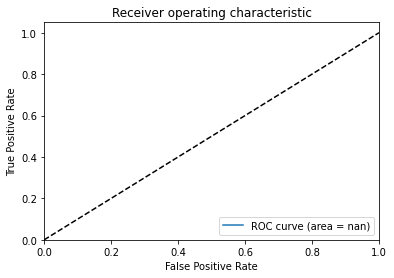

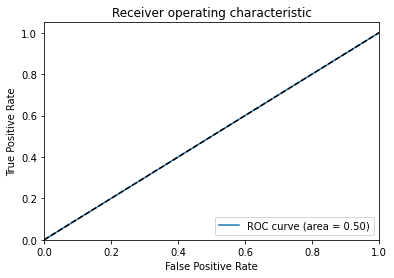

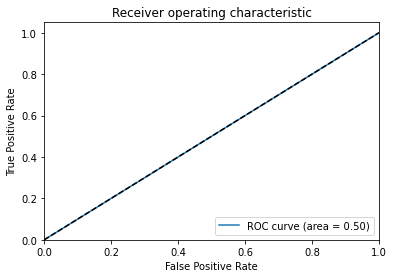

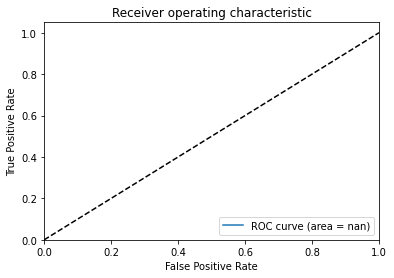

In [139]:
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()


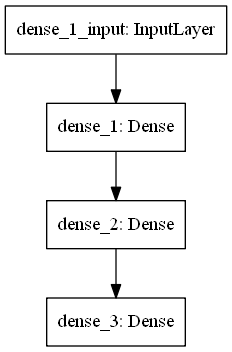

In [140]:
plot_model(model, to_file='model.png')

# LSTM RNN Model

In [141]:
student_vle_sel1=student_vle[["id_student","code_module","code_presentation","date","sum_click"]]
student_vle_sel1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10655280 entries, 0 to 10655279
Data columns (total 5 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   id_student         int64 
 1   code_module        object
 2   code_presentation  object
 3   date               int64 
 4   sum_click          int64 
dtypes: int64(3), object(2)
memory usage: 487.8+ MB


In [142]:
student_assessment_sel1=student_assessment[['id_student','date_submitted','score']]
student_assessment_sel1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173739 entries, 0 to 173911
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_student      173739 non-null  int64  
 1   date_submitted  173739 non-null  int64  
 2   score           173739 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 5.3 MB


In [143]:
student_assessment_sel1 = student_assessment_sel1.rename(columns={'date_submitted': 'date'})

In [144]:
student_info_sel1=student_info[['code_module','code_presentation','id_student','final_result']]
student_info_sel1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31482 entries, 0 to 32592
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   code_module        31482 non-null  object
 1   code_presentation  31482 non-null  object
 2   id_student         31482 non-null  int64 
 3   final_result       31482 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.2+ MB


In [145]:
student_vle_sel1.drop_duplicates(('id_student','date'), inplace=True)

In [146]:
print(student_vle_sel1[student_vle_sel1['id_student'] == 11391])

        id_student code_module code_presentation  date  sum_click
6758         11391         AAA             2013J    -5         16
11159        11391         AAA             2013J     0          5
13134        11391         AAA             2013J     1          5
14572        11391         AAA             2013J     2          3
19082        11391         AAA             2013J     6          2
23218        11391         AAA             2013J     9          2
33869        11391         AAA             2013J    17         27
34734        11391         AAA             2013J    18          8
45245        11391         AAA             2013J    29         12
46168        11391         AAA             2013J    30          3
46991        11391         AAA             2013J    31          1
51961        11391         AAA             2013J    37          1
54309        11391         AAA             2013J    40          2
59818        11391         AAA             2013J    47          6
60546     

In [147]:
final_data1=pd.merge(student_vle_sel1, student_info_sel1, on=['id_student','code_module','code_presentation'],how="outer")

In [148]:
final_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1740355 entries, 0 to 1740354
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   id_student         int64  
 1   code_module        object 
 2   code_presentation  object 
 3   date               float64
 4   sum_click          float64
 5   final_result       object 
dtypes: float64(2), int64(1), object(3)
memory usage: 92.9+ MB


In [149]:
final_data1=pd.merge(student_assessment_sel1,final_data1,on=['id_student','date'],how='outer')

In [150]:
final_data1 = resolveNANs(final_data1)

In [151]:
final_data1=changeData(final_data1, "final_result", "Fail", "1")
final_data1=changeData(final_data1, "final_result", "Withdrawn", "2")
final_data1=changeData(final_data1, "final_result", "Pass", "3")
final_data1=changeData(final_data1, "final_result", "Distinction", "4")

In [152]:
final_data1.drop(final_data1[final_data1.final_result == 'Nothing'].index, inplace=True)

In [153]:
#final_data1.to_csv('final_data_1.csv')

In [154]:
final_data1=final_data1.sort_values(by=['id_student','code_module','code_presentation','date'])

In [155]:
final_data1['id_student'].nunique()

27814

In [156]:
final_data2 = (final_data1.pivot_table(index=['code_module','code_presentation', 'id_student', 'final_result','date'], values=['sum_click', 'score']).reset_index())

Considering the data only for code module AAA as the dataset is very huge

In [157]:
final_data3=final_data2[final_data2['code_module'] == 'AAA']

In [158]:
final_data3=final_data3[final_data3['code_presentation'] == '2013J']

In [159]:
final_data3

,code_module,code_presentation,id_student,final_result,date,score,sum_click
0,AAA,2013J,11391,3,-5.0,0.0,16.0
1,AAA,2013J,11391,3,0.0,0.0,5.0
2,AAA,2013J,11391,3,1.0,0.0,5.0
3,AAA,2013J,11391,3,2.0,0.0,3.0
4,AAA,2013J,11391,3,6.0,0.0,2.0
...,...,...,...,...,...,...,...
32388,AAA,2013J,2698257,3,228.0,0.0,4.0
32389,AAA,2013J,2698257,3,233.0,0.0,2.0
32390,AAA,2013J,2698257,3,234.0,0.0,3.0
32391,AAA,2013J,2698257,3,235.0,0.0,2.0


In [160]:
type(final_data3)

pandas.core.frame.DataFrame

In [161]:
final_data3['id_student'].nunique()

368

In [162]:
studentlist=set()
for index, row in final_data3.iterrows():
    #print (row["id_student"])
    studentlist.add(row["id_student"])

In [163]:
len(studentlist)

368

In [164]:
final_data4=np.asarray(final_data3)

In [165]:
#rows = final_data4.shape[0]
#cols = final_data4.shape[1]
#print (rows)
#print (cols)

min_date=-24.0
max_date=268
range1=0
range2=0
final_data5=[]

row_index=rows


for student in studentlist:
    arrtemp=final_data3[final_data3['id_student'] == student]
    arrtemp=np.asarray(arrtemp)
    rows = arrtemp.shape[0]
    cols = arrtemp.shape[1]
    for x in range(0, rows-1):
        #print(arrtemp[x][1],date_value)
        #print(x)
        if x==0:
            range1=min_date
            range2=int(arrtemp[x][4])
            diff=range2-range1
            print(x,range1,range2,arrtemp[x][2])
            if diff > 1:
                for value in range(int(range1+1),int(range2)):
                    #print(final_data4[x][0],value,0.0,final_data4[x][3],0.0,final_data4[x][5])
                    final_data5.append([(arrtemp[x][0]),(arrtemp[x][1]),int(arrtemp[x][2]),int(arrtemp[x][3]),int(value),float(0.0),float(0.0)])
    
        range1=int(arrtemp[x][4])
        range2=int(arrtemp[x+1][4])
        print(x,range1,range2,arrtemp[x][2])
        diff=range2-range1
        #print(diff)
        if diff > 1:
            for value in range(int(range1+1),int(range2)):
                #print(final_data4[x][0],value,0.0,final_data4[x][3],0.0,final_data4[x][5])
                final_data5.append([(arrtemp[x][0]),(arrtemp[x][0]),int(arrtemp[x][2]),int(arrtemp[x][3]),value,float(0.0),float(0.0)])
 

    if x==(rows-2):
        range1=int(arrtemp[x+1][4])
        #range1=int(final_data3[x][3])
        range2=max_date
        #print(x,range1,range2,arrtemp[x][1])
        diff=range2-range1
        #print(diff)
        print(x,range1,range2,arrtemp[x][2])
        if diff > 1:
            for value in range(int(range1+1),int(range2)):
                #print(final_data4[x][0],value,0.0,final_data4[x][3],0.0,final_data4[x][5])
                final_data5.append([(arrtemp[x][0]),(arrtemp[x][1]),int(arrtemp[x][2]),int(arrtemp[x][3]),value,float(0.0),float(0.0)])
            
    

NameError: name 'rows' is not defined

In [ ]:
len(final_data5)

In [ ]:
len(final_data4)


In [ ]:
newArr = np.append(final_data5, final_data4,axis=0)

In [ ]:
len(newArr)

In [ ]:
newArr.shape

In [ ]:
rows1 = newArr.shape[0]
cols1 = newArr.shape[1]
temparr=[]

for x in range(0, rows1):
    newArr[x][1]=int(newArr[x][2])
    newArr[x][2]=int(newArr[x][3])
    newArr[x][3]=int(newArr[x][4])
    newArr[x][4]=float(newArr[x][5])
    newArr[x][5]=float(newArr[x][6])
    temparr.append(newArr[x][0])
    temparr.append(newArr[x][1])
    temparr.append(newArr[x][2])
    temparr.append(newArr[x][4])
    temparr.append(newArr[x][5])
    temparr.append(newArr[x][6])
    temparr.append(newArr[x][3])
    

In [ ]:
newArr

In [ ]:
#pd.DataFrame(newArr).to_csv("modifieddata1.csv")

In [ ]:
rows1 = newArr.shape[0]
cols1 = newArr.shape[1]
for x in range(0, rows1-1):
    print(newArr[x][1], newArr[x][3])
    
